# Introduction to MODIS Imagery

Moderate Resolution Imaging Spectrometer (MODIS) is a satellite-based instrument that continuously collects
data over the Earth's surface. Currently, MODIS has the finest temporal resolution of the publicly available remote sensing data, spanning the entire globe every 24 hrs. 

MODIS collects data across 36 spectral bands; however, in the class, you will only work with the first 7 bands. 

| Band | Wavelength range (nm) | Spatial Resolution (m) | Spectral Width (nm)|
|-------------------------------------|------------------|--------------------|----------------|
| Band 1 - red | 620 - 670 | 250 | 2.0 |
| Band 2 - near infrared | 841 - 876 | 250 | 6.0 |
| Band 3 -  blue/green | 459 - 479 | 500 | 6.0 |
| Band 4 - green | 545 - 565 | 500 | 3.0 |
| Band 5 - near infrared  | 1230 – 1250 | 500 | 8.0  |
| Band 6 - mid-infrared | 1628 – 1652 | 500 | 18 |
| Band 7 - mid-infrared | 2105 - 2155 | 500 | 18 |


### MODIS Surface Reflectance (MOD09GA Product)

There are many different MODIS data products. These are datasets that are processed for use in science. In this class we are using the MOD09GA product which is a reflectance product that includes the first 7 bands of MODIS.

The normal range of surface reflectance values is 0 to 1, where 1 is the BRIGHTEST values and 0 is the darkest value. Surface reflectance is a measure of the spectral reflectance of the earth's surface, as it would be if measured one the ground. You can think of it - as what your eye would see - except ofcourse your eye can't seem light outside of the visible part of the electromagnetic spectrum. 

<a href="https://modis.gsfc.nasa.gov/data/dataprod/mod09.php" target="_blank">MODIS</a> provides many standardized products, including the MOD09GA product of surface reflectance which you will use in this course. The MOD09GA product provides surface reflectance at a spatial resolution of 500m across the 7 spectral bands listed in the table above. 

According to the <a href="http://modis-sr.ltdri.org/" target="_blank">Land Surface Reflectance Science Computing Facility</a>, who creates the MOD09 products, the products are *estimates of the surface spectral reflectance for each band as it would have been measured at ground level as if there were no atmospheric scattering or absorption. It corrects for the effects of atmospheric gases, aerosols, and thin cirrus clouds.*

### Band Metadata for the MOD09GA Product

To better understand the MODIS data, have a look at the <a href="http://modis-sr.ltdri.org/guide/MOD09_UserGuide_v1_3.pdf" target="_blank">detailed table for the MOD09GA product in the MODIS users guide on page 14</a>.

Part of the table is below:

| Science Data Sets (HDF Layers (21)) | Units  | Data Type | Fill Value (no data) | Valid Range | Scale Factor |
|---|---|---|---|---|---|
| surf_Refl_b01: 500m Surface Reflectance Band 1 (620-670 nm) | Reflectance | 16-bit signed integer | -28672 | -100 to 16000 | 0.0001 |
| surf_Refl_b02: 500m Surface Reflectance Band 2 (841-876 nm) | Reflectance | 16-bit signed integer  | -28672 | -100 to 16000 | 0.0001 |
| surf_Refl_b03: 500m Surface Reflectance Band 3 (459-479 nm)| Reflectance | 16-bit signed integer  | -28672 | -100 to 16000 | 0.0001 |
| surf_Refl_b04: 500m Surface Reflectance Band 4 (545-565 nm)| Reflectance | 16-bit signed integer  | -28672 | -100 to 16000 | 0.0001 |
| surf_Refl_b05: 500m Surface Reflectance Band 5 (1230-1250 nm)| Reflectance | 16-bit signed integer  | -28672 | -100 to 16000 | 0.0001 |
| surf_Refl_b06: 500m Surface Reflectance Band 6 (1628-1652 nm) | Reflectance | 16-bit signed integer  | -28672 | -100 to 16000 | 0.0001 |
| surf_Refl_b07: 500m Surface Reflectance Band 7 (2105-2155 nm) | Reflectance | 16-bit signed integer  | -28672 | -100 to 16000 | 0.0001 |

Using this table for the MOD09GA product, answer the following questions:
1. What is valid range of values for our data?
2. What the no data value?
3. What is the scale factor associated with our data?


### Identify MODIS Bands for NBR Calculations

This week in class, you will be calculating NBR using MODIS data. However even though you can calculate the same vegetaion indices with many different remote sensing produts, remember that the bands for each remote sensing data  are different. Review the table above which displays the band ranges for the MODIS sensor. Recall that the NBR index will work with any multispectral sensor with a NIR band between 760 - 900 nm and a SWIR band between 2080 - 2350 nm.



## Open MODIS Imagery

In this lesson, you will learn how to open MODIS data using the pre-fire MODIS imagery for the Coldsprings fire study area in Colorado. 

Before you get started, import the following packages and make sure that your working directory is set.

In [1]:
import os

import numpy as np
import numpy.ma as ma 
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
from glob import glob

plt.ion()

os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In previous lessons, you have used `glob("*keyword*.tif")` to create a list of all files that both:
1. Contain a certain keyword as denoted by the asterisks (e.g. `*band*`) and
2. Contain the extension `.tif`.

Begin by using glob to create a list of MODIS surface reflectance rasters using the keyword and extension `*sur_refl*.tif`. 

In [2]:
# Create list of MODIS rasters for surface reflectance
modis_bands_pre_list = glob("data/cold-springs-fire/modis/reflectance/07_july_2016/crop/*_sur_refl_*b*.tif")

# Sort the list of bands
modis_bands_pre_list.sort()
modis_bands_pre_list

['data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b01_1.tif',
 'data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b02_1.tif',
 'data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b03_1.tif',
 'data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b04_1.tif',
 'data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b05_1.tif',
 'data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b06_1.tif',
 'data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b07_1.tif']

Next, use the function `es.stack_raster_tifs` to create the raster stack from the list of bands you created using glob. Then, you can import the MODIS bands as well as the Cold Springs fire boundary, which you can use to crop the MODIS bands. Note that this is a demonstration of how to import the data. For your homework you will mask the data and remove NA values in one step! You don't need to read the data in and then mask it using 2 separate rasterio import statements.

In [3]:
# Create raster stack
modis_bands_pre_out = "data/cold-springs-fire/outputs/modis_bands_pre.tif"
es.stack_raster_tifs(modis_bands_pre_list,
                     modis_bands_pre_out)

# Open raster stack
with rio.open(modis_bands_pre_out) as src_modis_bands:
    modis_bands_pre = src_modis_bands.read(masked=True)
    modis_bands_bounds = src_modis_bands.bounds
    modis_bands_meta = src_modis_bands.profile

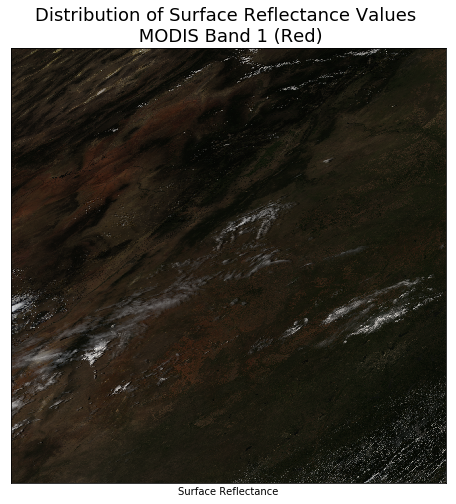

In [4]:
# Plot histogram of values
fig, ax = plt.subplots(figsize=(8, 8))

es.plot_rgb(modis_bands_pre,
            ax=ax,
            rgb=[0, 3, 2])
ax.set_title('Distribution of Surface Reflectance Values \n MODIS Band 1 (Red)',
             fontsize=18)
ax.set_xlabel("Surface Reflectance")

plt.show()

## Explore Data Values

To start exploring the data, you can calculate the minimum and maximum values of select bands to see the range of values. For example, you can calculate these values for the first band (red) of the MODIS stack. 

In [5]:
# Identify minimum and maximum values of band 1 (red)
print(modis_bands_pre[1].min(), modis_bands_pre[1].max())

-100 10039


It appears as if you have a very large negative value in your data. You can set that data value to `NA` using the `mask=True` argument in rasterio however you also need to crop the data for your homework. 

You can do both things in two steps below.

1. Import the fire boundary that you will use toe crop your data
2. Reproject the fire boundary so it's in the same CRS as your MODIS data
3. Crop the MODIS data using the fire boundary and the `crop_image()` function in earthpy. Alternatively you could use the `rasterio.mask.mask()` (`rasterio.mask` specifies the mask module). The `crop_image` uses rasterio to crop your data on the back end!


In [6]:
# Open fire boundary
fire_boundary_path = "data/cold-springs-fire/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp"
fire_boundary = gpd.read_file(fire_boundary_path)

# Open and crop modis data, reproject fire boundary
with rio.open(modis_bands_pre_out) as src_modis_pre:
    fire_bound_sin = fire_boundary.to_crs(src_modis_pre.crs)
    modis_pre_crop, modis_pre_meta = es.crop_image(src_modis_pre, fire_bound_sin)
    modis_bands_pre_data = ma.masked_where(modis_pre_crop == -28672, modis_pre_crop)
    
print(modis_pre_crop.min(), modis_pre_crop[1].max())

203 3013


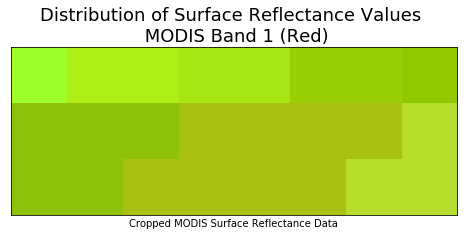

In [7]:
# Plot histogram of values
fig, ax = plt.subplots(figsize=(8, 8))

es.plot_rgb(modis_pre_crop,
            ax=ax,
            rgb=[0, 3, 2])
ax.set_title('Distribution of Surface Reflectance Values \n MODIS Band 1 (Red)',
             fontsize=18)
ax.set_xlabel("Cropped MODIS Surface Reflectance Data")

plt.show()

This looks better. Now the nodata values are masked from the data. Create a histogram to look at the distribution of pixel values. Does the range of values look reasonable?

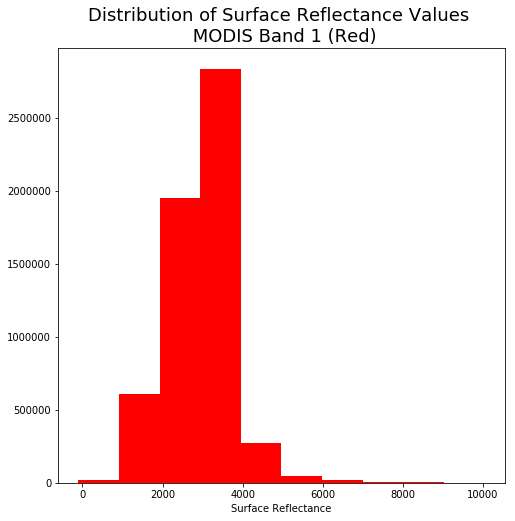

In [8]:
# Plot histogram of values
fig, ax = plt.subplots(figsize=(8, 8))

ax.hist(modis_bands_pre[1].ravel(),
        color="red")
ax.set_title('Distribution of Surface Reflectance Values \n MODIS Band 1 (Red)',
             fontsize=18)
ax.set_xlabel("Surface Reflectance")

# Turn off scientific notation
ax.ticklabel_format(useOffset=False,
                    style='plain')

## Reflectance Values in MODIS Imagery

As noted previously in the lesson, the normal range of reflectance values is 0 to 1, where 1 is the BRIGHTEST values and 0 is the darkest value. 

Look again at the minimum and maximum values that you calculated above for band 1. What do you notice?

As you can see, the minimum and maximum values are widely outside of the expected range of 0 to 1. Looking at histogram of band 1, you can also see that the range of values is not what you would expect. 

What could be causing this? To answer this question, you need to better understand the data before you can work with it more. 



## Scale Factor

Scale factors are common when using remote sensing data. The data are large and scale factors are used to keep the data smaller in size. For example, it takes much more space to store numbers with decimals (known as floating points) than it does to store an integer. Thus often remove sensing data have a scale factor applied that can be used to 

Looking at the table for the MOD09GA product, you can see that the MODIS data have a scale factor of 0.0001. This means you should multiple each layer by that value to get the actual reflectance values of the data.

You can apply this scale factor value to all of the layers in your stack using numpy array math sometimes referred to as raster math in GIS tools. Here you multiply the entire array by .0001 to scale each layer or band.

In [9]:
# Scale values of MODIS imagery stack
modis_bands_pre_scaled = modis_bands_pre * 0.0001

Now the range of values for surface reflectance appear more appropriate, but are still not between 0 and 1. 

In [10]:
# Identify minimum and maximum values of scaled band 1 (red)
print(modis_bands_pre_scaled[1].min(), modis_bands_pre_scaled[1].max())

-0.01 1.0039


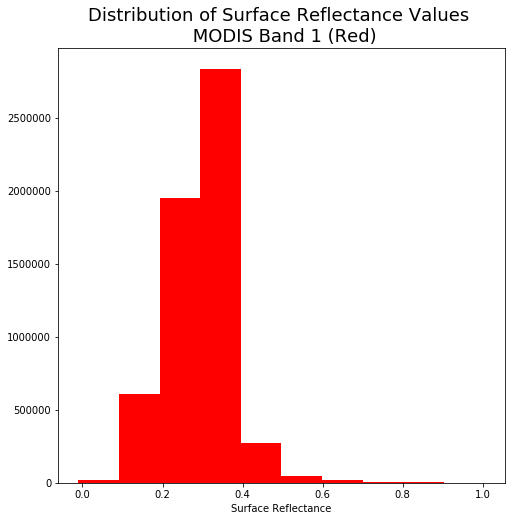

In [11]:
# Plot histogram of values
fig, ax = plt.subplots(figsize=(8, 8))

ax.hist(modis_bands_pre_scaled[1].ravel(),
        color="red")
ax.set_title('Distribution of Surface Reflectance Values \n MODIS Band 1 (Red)',
             fontsize=18)
ax.set_xlabel("Surface Reflectance")

# Turn off scientific notation
ax.ticklabel_format(useOffset=False,
                    style='plain')

Now, you have a MODIS surface reflectance stack that you can use in further analysis. You are ready to calculate dNBR for your homework! 